# KNN ( K Nearest Neighbores) Classification : 

In [2]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df = pd.DataFrame(iris.data , columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df.shape

(150, 5)

In [13]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [15]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [18]:
df['flower_name']= df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [24]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

## Sepal Length VS Sepal Width ( setosa Vs versicolor)

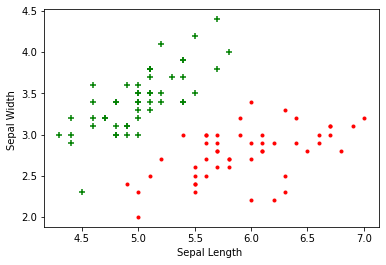

In [28]:
plt.xlabel('Sepal Length ')
plt.ylabel('Sepal Width ')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green',marker="+")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'red',marker=".")

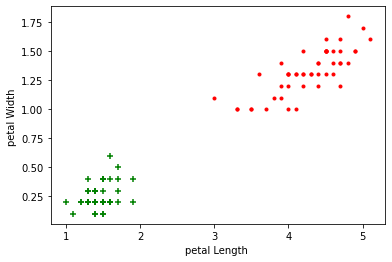

In [31]:
plt.xlabel('petal Length ')
plt.ylabel('petal Width ')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'green',marker="+")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'red',marker=".")

## train test split 

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
x = df.drop(['target','flower_name'], axis = 1)
y = df.target

In [39]:
x_train , x_test , y_train, y_test = train_test_split (x, y , test_size=0.2,random_state=1)

In [40]:
len(x_train)

120

In [41]:
len(x_test)

30

## create KNN (K Neighrest Neigbhour Classifier)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn =  KNeighborsClassifier(n_neighbors=3)

In [47]:
model = knn.fit(x_train , y_train)

In [48]:
# acc
model.score(x_test,y_test)

1.0

In [50]:
# cofusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)

In [55]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

## visualization

Text(51.0, 0.5, 'Atual values')

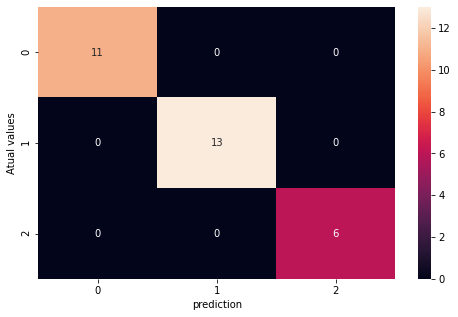

In [57]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(cm , annot = True)
plt.xlabel('prediction')
plt.ylabel('Atual values')

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

